In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
df = pd.read_csv('../input/california-housing-prices/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Using OneHotEncoder to deal with Categorical Variables

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
df_ohe = pd.DataFrame(ohe.fit_transform(df[['ocean_proximity']]))

Reassigning the index to output of ohe

In [7]:
df_ohe.index = df.index
df_num = df.drop(['ocean_proximity'], axis=1)
df2 = pd.concat([df_num, df_ohe], axis=1)
df2.head()

# One hot encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data = df2.dropna(axis=0)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
0                     0
1                     0
2                     0
3                     0
4                     0
dtype: int64

In [9]:
data.shape

(20433, 14)

# Plots

In [10]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
0,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<AxesSubplot:>

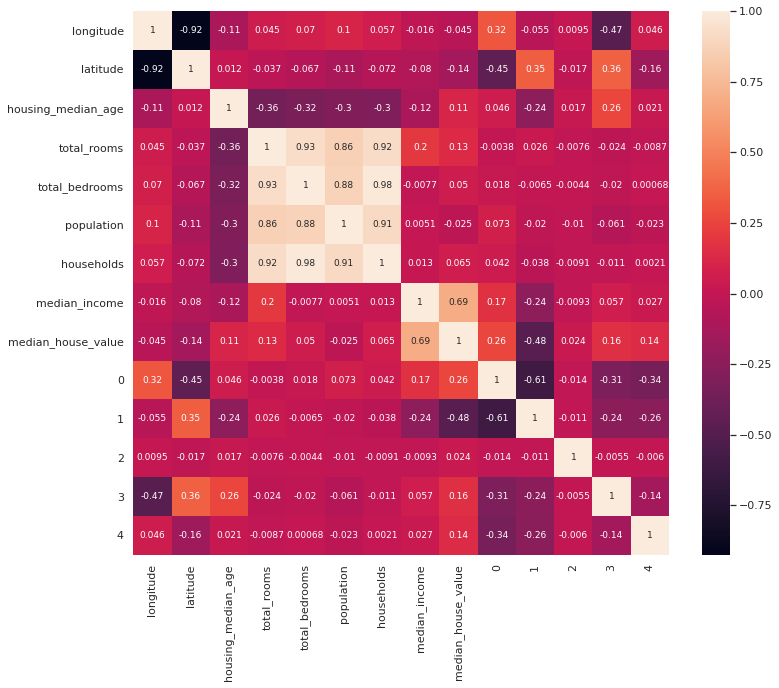

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, annot_kws = {'size':9}, xticklabels=data.columns, yticklabels=data.columns, ax=ax)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

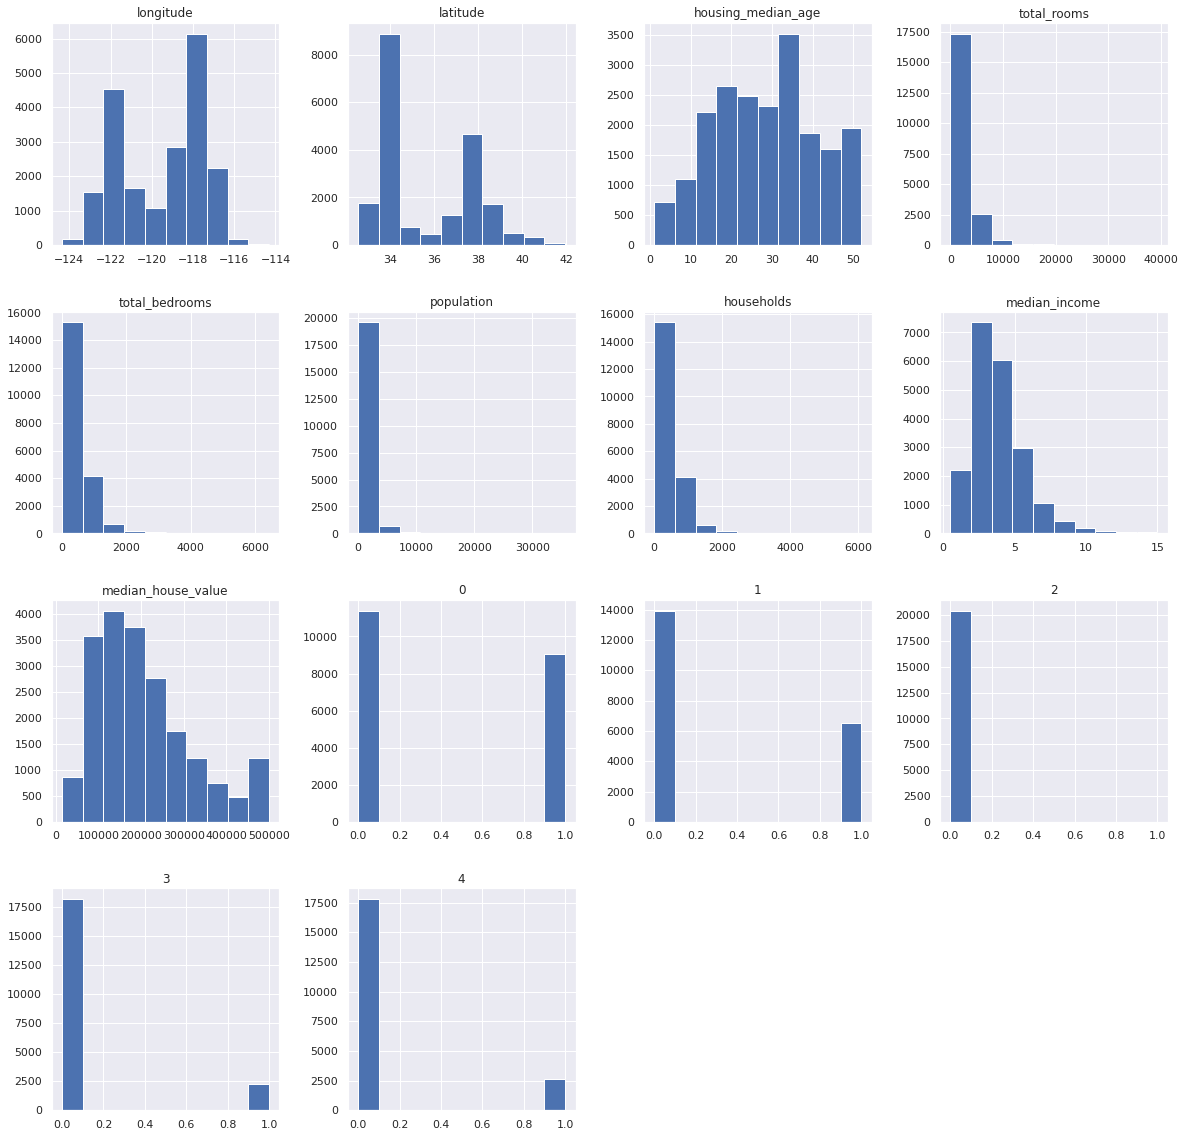

In [12]:
data.hist(figsize=(20, 20))

median_house_value as the target and rest as features.

In [13]:
y = data.median_house_value
X = data.drop(columns = 'median_house_value')

In [14]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0


In [15]:
from sklearn.model_selection import train_test_split
train_x, text_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.25)

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)

model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [17]:
predic_y = model.predict(text_x)

In [18]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(test_y, predic_y))

43869.89821882952


# get_mae

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_y = model.predict(test_x)
    return mean_absolute_error(test_y, preds_y)

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)

# getting the mae for different values of leaf nodes in a DecisionTreeRegressor
for max_leaf_nodes in [5, 50, 500, 5000]:
    op_mae = get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, op_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  58497
Max leaf nodes: 50  		 Mean Absolute Error:  45608
Max leaf nodes: 500  		 Mean Absolute Error:  39361
Max leaf nodes: 5000  		 Mean Absolute Error:  41853


Got the least mean absolute error for max_leaf_nodes = 500
# Random Forest
Getting the values of train_x, test_x, train_y, test_y from above train_test_split<br>


In [20]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(random_state=1)
model2.fit(train_x, train_y)
preds_y2 = model2.predict(test_x)
print(mean_absolute_error(test_y, preds_y2))

32110.01959628089


In [21]:
def get_mae_rf(n_estimators, train_x, test_x, train_y, test_y):
    model5 = RandomForestRegressor(n_estimators = n_estimators, random_state=1)
    model5.fit(train_x, train_y)
    preds_y5 = model5.predict(test_x)
    return mean_absolute_error(test_y, preds_y5)

train_x5, test_x5, train_y5, test_y5 = train_test_split(X, y, random_state=0, test_size=0.2)

# getting mae for different number of estimators in a RandomForestRegressor
for n_estimators in [5, 50, 500]:
    op_mae = get_mae_rf(n_estimators, train_x5, test_x5, train_y5, test_y5)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, op_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  36111
Max leaf nodes: 50  		 Mean Absolute Error:  32317
Max leaf nodes: 500  		 Mean Absolute Error:  31866


So far the RandomForestRegressor is performing much better than the DecisionTrees and LinearRegression. The mae achieved is lower, the best I could get was for the n_estimators around 500 and around 5000 there wasn't much change.<br>
Max leaf nodes: 5  		 Mean Absolute Error:  36111<br>
Max leaf nodes: 50  		 Mean Absolute Error:  32317<br>
Max leaf nodes: 500  		 Mean Absolute Error:  31866<br>
Max leaf nodes: 5000  		 Mean Absolute Error:  31841<br>


In [22]:
from sklearn.metrics import r2_score
print(r2_score(test_y, preds_y2))

0.8170527868652206


Got even less mae than decision trees
# Using Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(train_x, train_y)

LinearRegression()

In [24]:
preds_y3 = model3.predict(test_x)

In [25]:
print(mean_absolute_error(test_y, preds_y3))

49964.012826838


In [26]:
test_y.mean()

207787.83582089553

In [27]:
preds_y3.mean()

207561.5478245812

# Geo Plots
The description mentions that this data is with respect to 1990 California census. Although there shouldn't be anything weird on the plots as real estate can be fine for somewhat these many years, but something might change, plots are with respect to 1990 census.

In [28]:
import geopandas as gpd

In [29]:
data_geodf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))
#Set the coordinate reference system CRS to EPSG 4326
data_geodf.crs = {'init': 'epsg:4326'}

data_geodf.head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


A map showing the state of California

In [30]:
import folium
from folium import Choropleth, Circle, Marker

latitude = 36.7783
longitude = -119.4179

m1 = folium.Map(location = [latitude, longitude], zoom_start=5)
m1

Plotting the houses near bay 

In [31]:
nearbay_df = data_geodf.loc[data_geodf['ocean_proximity'] == 'NEAR BAY']

In [32]:
nearbay_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


In [33]:
latitude = 36.7783
longitude = -119.4179

m2 = folium.Map(location = [latitude, longitude], tiles='cartodbpositron', zoom_start=7)
for idx, row in nearbay_df.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m2)
m2

A better plot using marker cluster as we have a lot of points eventhough we are just plotting the NEARBAY ones

In [34]:
import math
from folium.plugins import MarkerCluster

In [35]:
m3 = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=5)

mc = MarkerCluster()

for idx, row in nearbay_df.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m3.add_child(mc)














<1H OCEAN     9136<br>
INLAND        6551<br>
NEAR OCEAN    2658<br>
NEAR BAY      2290<br>
ISLAND           5<br>
Name: ocean_proximity, dtype: int64

In [36]:
df.groupby('ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


The mean value of median_house_value for the ocean_proximity is quite high as compared to others, have look where they are located on the basis of their provided lat and long.

In [37]:
island_df = data_geodf.loc[data_geodf['ocean_proximity'] == 'ISLAND']

m4 = folium.Map(location = [latitude, longitude], tiles='cartodbpositron', zoom_start=4)
for idx, row in island_df.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m4)
m4
